In [1]:
import pandas as pd
import covid19_module

In [2]:
df_cases_raw = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", index_col=False)
df_deaths_raw = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv", index_col=False)
df_recoveries_raw = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv", index_col=False)
df_population_raw = pd.read_csv("./population_data/API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv")

df_cases = covid19_module.preprocess_frame(df_cases_raw)
df_deaths = covid19_module.preprocess_frame(df_deaths_raw)
df_recoveries = covid19_module.preprocess_frame(df_recoveries_raw)
df_population = df_population_raw[["Country Name", "2018"]]

covid19_module.shift_to_day_zero(df_cases, df_cases)
covid19_module.shift_to_day_zero(df_deaths, df_deaths)
covid19_module.shift_to_day_zero(df_recoveries, df_recoveries)

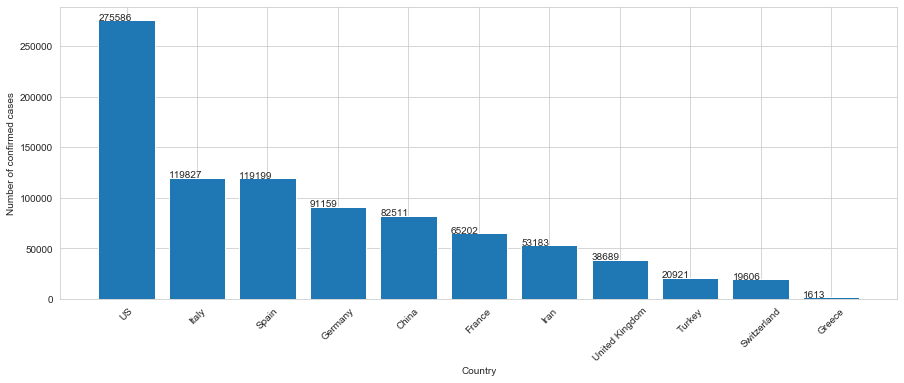

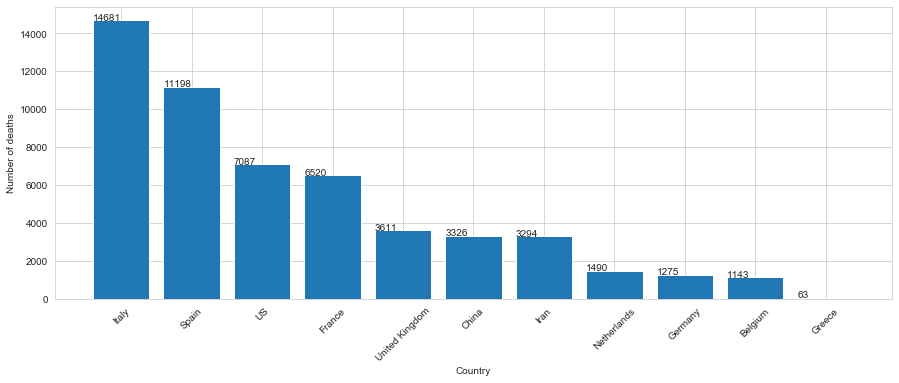

In [3]:
top_cases = covid19_module.top_countries(df_cases_raw)
top_deaths = covid19_module.top_countries(df_deaths_raw)

covid19_module.plot_top_countries(df_cases, top_cases, "confirmed")
covid19_module.plot_top_countries(df_deaths, top_deaths, "deaths")

#covid19_module.print_mortality_rates(df_cases, df_deaths, top_deaths)
#covid19_module.print_percentage_infected(df_cases, df_population, top_cases)
#covid19_module.print_permil_deaths(df_deaths, df_population, top_deaths)

In [ ]:
#%matplotlib notebook
covid19_module.plot_growth(df_cases, top_cases, "confirmed")
covid19_module.plot_growth(df_deaths, top_deaths, "deaths")

In [ ]:
#%matplotlib notebook
covid19_module.plot_case_death_recovery('China', df_cases, df_deaths, df_recoveries)
covid19_module.plot_case_death_recovery('notChina', df_cases, df_deaths, df_recoveries)

*** US ***


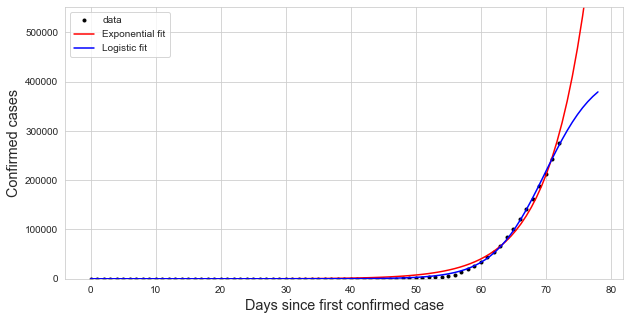

---Exponential fit---

chi^2 =  91613.68220430368 

R^2 =  0.9920355314437491 

fit parametes: a=2.027, b=0.165, c=-100.000

covariance matrix:
 [[ 2.701e-01 -1.899e-03 -1.872e+02]
 [-1.899e-03  1.338e-05  1.275e+00]
 [-1.872e+02  1.275e+00  6.087e+05]]

---Logistic fit---

chi^2 =  19002.502049412768 

R^2 =  0.999242078555358 

fit parametes: a=427954.776, b=54555.118, c=0.251, d=26.405, e=0.000

covariance matrix:
 [[ 1.526e+08  4.622e+01 -5.064e+01 -5.861e+03 -7.714e+05]
 [ 4.622e+01  1.400e-05 -1.530e-05 -1.768e-03 -2.320e-01]
 [-5.064e+01 -1.530e-05  2.014e-05  2.501e-03  3.747e-01]
 [-5.861e+03 -1.768e-03  2.501e-03  3.185e-01  5.192e+01]
 [-7.714e+05 -2.320e-01  3.747e-01  5.192e+01  5.755e+04]] 

*** Italy ***


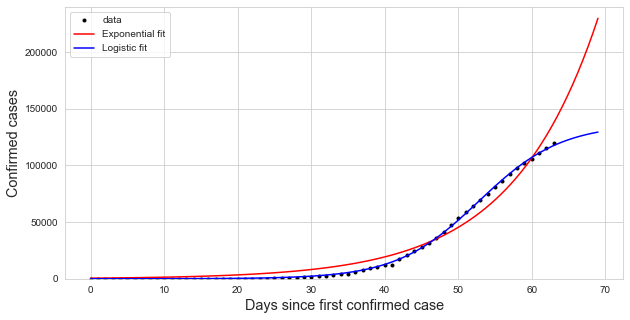

---Exponential fit---

chi^2 =  147646.29660701152 

R^2 =  0.9716024697796256 

fit parametes: a=640.898, b=0.085, c=-100.000

covariance matrix:
 [[ 3.057e+04 -7.789e-01 -1.880e+05]
 [-7.789e-01  1.998e-05  4.601e+00]
 [-1.880e+05  4.601e+00  2.035e+06]]

---Logistic fit---

chi^2 =  7605.626101315936 

R^2 =  0.9995728435054513 

fit parametes: a=136479.615, b=49419.778, c=0.178, d=-7.787, e=0.000

covariance matrix:
 [[ 2.013e+06 -2.618e+12 -3.120e+00  2.969e+08 -8.717e+04]
 [-2.618e+12  3.703e+19  4.155e+06 -4.199e+15  5.451e+10]
 [-3.120e+00  4.155e+06  6.074e-06 -4.710e+02  1.748e-01]
 [ 2.969e+08 -4.199e+15 -4.710e+02  4.760e+11 -6.181e+06]
 [-8.717e+04  5.451e+10  1.748e-01 -6.181e+06  2.175e+04]] 

*** Spain ***


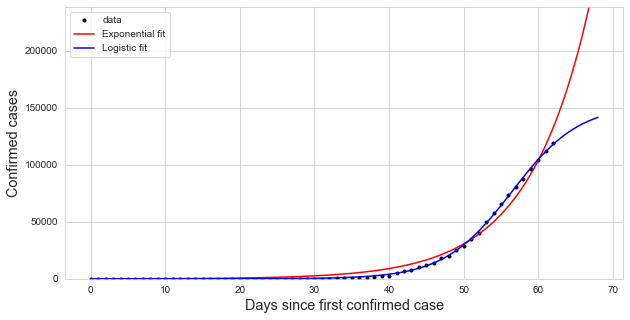

---Exponential fit---

chi^2 =  76646.6767463079 

R^2 =  0.9839469522688218 

fit parametes: a=68.758, b=0.122, c=-100.000

covariance matrix:
 [[ 3.259e+02 -7.893e-02 -8.291e+03]
 [-7.893e-02  1.919e-05  1.929e+00]
 [-8.291e+03  1.929e+00  5.591e+05]]

---Logistic fit---

chi^2 =  6497.478142914711 

R^2 =  0.99957206922462 

fit parametes: a=152771.938, b=56991.251, c=0.220, d=6.697, e=0.000

covariance matrix:
 [[ 4.822e+06 -1.119e+12 -6.068e+00  8.918e+07 -8.404e+04]
 [-1.119e+12  6.127e+19  3.679e+06 -4.885e+15  5.206e+10]
 [-6.068e+00  3.679e+06  9.532e-06 -2.933e+02  1.484e-01]
 [ 8.918e+07 -4.885e+15 -2.933e+02  3.895e+11 -4.151e+06]
 [-8.404e+04  5.206e+10  1.484e-01 -4.151e+06  1.315e+04]] 

*** Germany ***


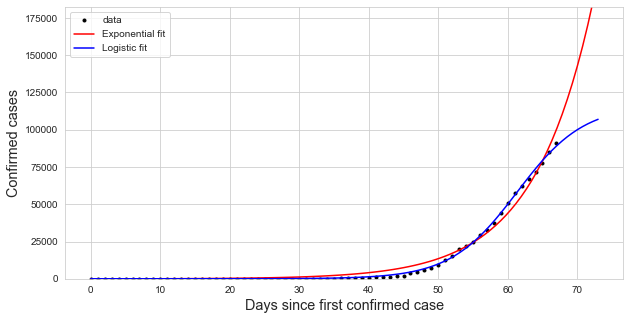

---Exponential fit---

chi^2 =  60657.88876054804 

R^2 =  0.9841937019503058 

fit parametes: a=38.099, b=0.118, c=-100.000

covariance matrix:
 [[ 9.707e+01 -3.927e-02 -3.067e+03]
 [-3.927e-02  1.595e-05  1.193e+00]
 [-3.067e+03  1.193e+00  2.700e+05]]

---Logistic fit---

chi^2 =  6515.649694288944 

R^2 =  0.9989625103372544 

fit parametes: a=116369.873, b=57935.226, c=0.209, d=8.846, e=0.000

covariance matrix:
 [[ 6.630e+06  3.764e-02 -1.005e+01 -1.918e+03 -1.048e+05]
 [ 3.764e-02  1.771e-09  1.788e-08  7.964e-06  9.625e-04]
 [-1.005e+01  1.788e-08  1.886e-05  3.813e-03  2.233e-01]
 [-1.918e+03  7.964e-06  3.813e-03  7.829e-01  4.924e+01]
 [-1.048e+05  9.625e-04  2.233e-01  4.924e+01  1.581e+04]] 

*** China ***


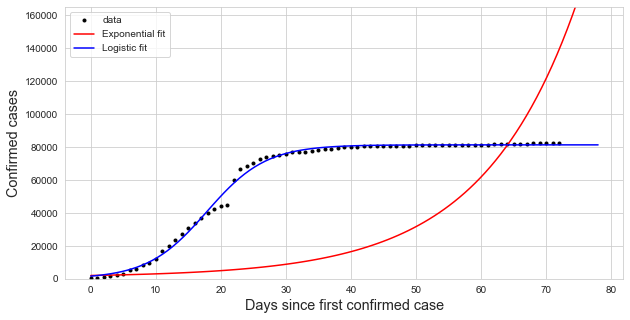

---Exponential fit---

chi^2 =  13031850.816284174 

R^2 =  -1.3206159583831152 

fit parametes: a=1000.000, b=0.068, c=1000.000

covariance matrix:
 [[ 2.972e+06 -4.235e+01 -1.419e+07]
 [-4.235e+01  6.082e-04  1.944e+02]
 [-1.419e+07  1.944e+02  1.089e+08]]

---Logistic fit---

chi^2 =  10200.980296940692 

R^2 =  0.9956787603718271 

fit parametes: a=81308.745, b=35092.616, c=0.220, d=-29.795, e=0.000

covariance matrix:
 [[ 1.299e+06  1.530e+11 -7.044e+00 -1.984e+07 -1.127e+06]
 [ 1.530e+11  3.012e+20  2.891e+07 -3.904e+16 -7.575e+11]
 [-7.044e+00  2.891e+07  7.127e-05 -3.748e+03  5.954e+00]
 [-1.984e+07 -3.904e+16 -3.748e+03  5.062e+12  9.820e+07]
 [-1.127e+06 -7.575e+11  5.954e+00  9.820e+07  1.063e+06]] 

*** France ***


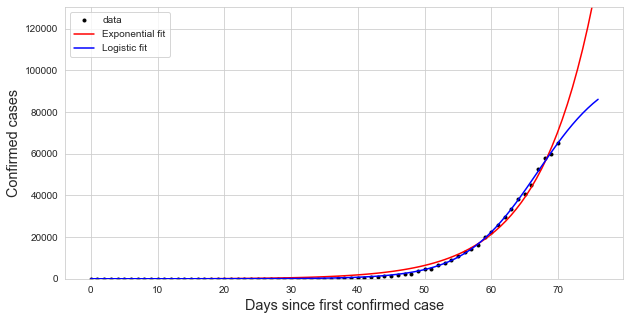

---Exponential fit---

chi^2 =  25786.247331491915 

R^2 =  0.9914316423649022 

fit parametes: a=16.365, b=0.120, c=-100.000

covariance matrix:
 [[ 1.015e+01 -9.149e-03 -4.596e+02]
 [-9.149e-03  8.272e-06  3.984e-01]
 [-4.596e+02  3.984e-01  6.268e+04]]

---Logistic fit---

chi^2 =  3964.6858193954677 

R^2 =  0.9991849506214237 

fit parametes: a=102554.943, b=55902.805, c=0.183, d=7.254, e=0.000

covariance matrix:
 [[ 9.550e+06 -5.974e-01 -9.768e+00 -2.154e+03 -7.804e+04]
 [-5.974e-01  3.920e-08  6.700e-07  1.535e-04  6.084e-03]
 [-9.768e+00  6.700e-07  1.190e-05  2.807e-03  1.146e-01]
 [-2.154e+03  1.535e-04  2.807e-03  6.779e-01  2.990e+01]
 [-7.804e+04  6.084e-03  1.146e-01  2.990e+01  5.758e+03]] 

*** Iran ***


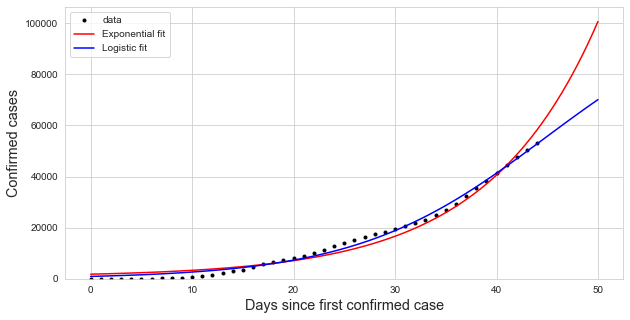

---Exponential fit---

chi^2 =  37146.25893983202 

R^2 =  0.9802525820795991 

fit parametes: a=1000.000, b=0.092, c=790.378

covariance matrix:
 [[ 5.249e+04 -1.203e+00 -1.592e+05]
 [-1.203e+00  2.785e-05  3.523e+00]
 [-1.592e+05  3.523e+00  6.604e+05]]

---Logistic fit---

chi^2 =  20846.198335948986 

R^2 =  0.9931329374173042 

fit parametes: a=110496.080, b=48225.065, c=0.107, d=-56.258, e=0.000

covariance matrix:
 [[ 6.205e+08 -1.955e+02 -2.675e+02 -1.607e+05 -1.356e+07]
 [-1.955e+02  6.196e-05  8.624e-05  5.246e-02  4.504e+00]
 [-2.675e+02  8.624e-05  1.262e-04  7.936e-02  7.071e+00]
 [-1.607e+05  5.246e-02  7.936e-02  5.098e+01  4.697e+03]
 [-1.356e+07  4.504e+00  7.071e+00  4.697e+03  5.381e+05]] 

*** United Kingdom ***


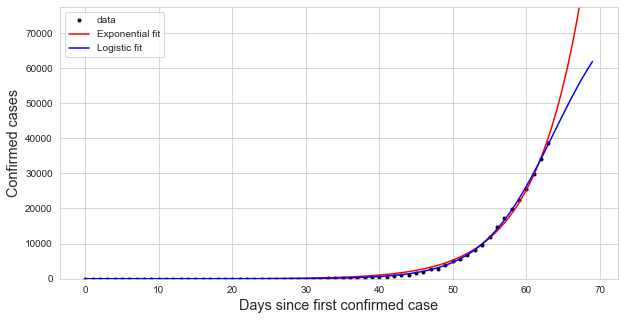

---Exponential fit---

chi^2 =  2872.1303689369565 

R^2 =  0.9966970383899998 

fit parametes: a=2.326, b=0.155, c=-100.000

covariance matrix:
 [[ 1.148e-01 -8.061e-04 -1.480e+01]
 [-8.061e-04  5.674e-06  1.002e-01]
 [-1.480e+01  1.002e-01  7.004e+03]]

---Logistic fit---

chi^2 =  1074.3540853187314 

R^2 =  0.9994411706264074 

fit parametes: a=82842.508, b=57245.410, c=0.205, d=10.348, e=0.000

covariance matrix:
 [[ 1.525e+07 -2.721e+00 -1.292e+01 -1.766e+03 -4.483e+04]
 [-2.721e+00  4.861e-07  2.341e-06  3.238e-04  8.376e-03]
 [-1.292e+01  2.341e-06  1.269e-05  1.919e-03  5.495e-02]
 [-1.766e+03  3.238e-04  1.919e-03  3.073e-01  9.630e+00]
 [-4.483e+04  8.376e-03  5.495e-02  9.630e+00  1.240e+03]] 

*** Turkey ***


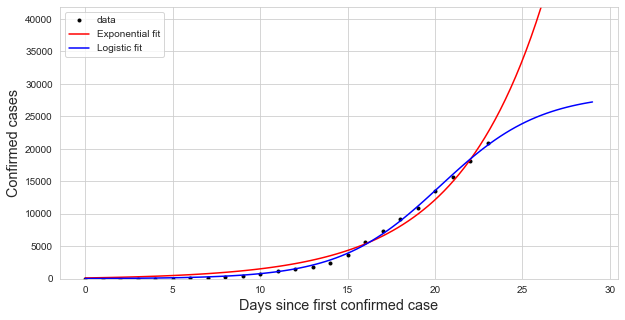

---Exponential fit---

chi^2 =  6348.117220507571 

R^2 =  0.9847892436681388 

fit parametes: a=211.854, b=0.203, c=-100.000

covariance matrix:
 [[ 4.350e+03 -9.032e-01 -1.829e+04]
 [-9.032e-01  1.891e-04  3.652e+00]
 [-1.829e+04  3.652e+00  1.201e+05]]

---Logistic fit---

chi^2 =  1008.3214547103097 

R^2 =  0.998428224325889 

fit parametes: a=28529.971, b=50996.972, c=0.348, d=-10.857, e=0.000

covariance matrix:
 [[ 9.706e+06  1.485e+14 -5.782e+01 -8.365e+09 -1.508e+05]
 [ 1.485e+14  3.079e+21 -6.706e+08 -1.735e+17 -1.363e+12]
 [-5.782e+01 -6.706e+08  4.470e-04  3.778e+04  1.422e+00]
 [-8.365e+09 -1.735e+17  3.778e+04  9.774e+12  7.681e+07]
 [-1.508e+05 -1.363e+12  1.422e+00  7.681e+07  1.155e+04]] 

*** Switzerland ***


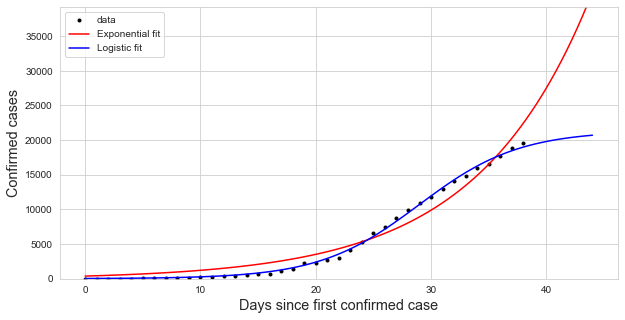

---Exponential fit---

chi^2 =  19159.277484983522 

R^2 =  0.9617995891262061 

fit parametes: a=472.099, b=0.102, c=-100.000

covariance matrix:
 [[ 2.797e+04 -1.563e+00 -7.766e+04]
 [-1.563e+00  8.826e-05  4.193e+00]
 [-7.766e+04  4.193e+00  2.855e+05]]

---Logistic fit---

chi^2 =  1014.1473162156502 

R^2 =  0.9982798212268387 

fit parametes: a=21346.279, b=53042.180, c=0.231, d=-18.128, e=0.000

covariance matrix:
 [[ 2.686e+05 -5.217e+12 -4.189e+00  4.258e+08 -2.470e+04]
 [-5.217e+12  8.383e+20  1.063e+08 -6.842e+16  2.553e+11]
 [-4.189e+00  1.063e+08  7.986e-05 -8.672e+03  4.549e-01]
 [ 4.258e+08 -6.842e+16 -8.672e+03  5.584e+12 -2.083e+07]
 [-2.470e+04  2.553e+11  4.549e-01 -2.083e+07  7.523e+03]] 

*** Greece ***


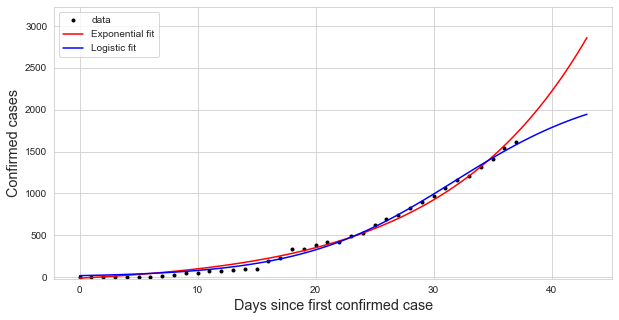

---Exponential fit---

chi^2 =  360.6051944176534 

R^2 =  0.9920289442268416 

fit parametes: a=88.063, b=0.082, c=-100.000

covariance matrix:
 [[ 1.654e+02 -4.918e-02 -3.182e+02]
 [-4.918e-02  1.479e-05  9.204e-02]
 [-3.182e+02  9.204e-02  7.089e+02]]

---Logistic fit---

chi^2 =  339.2302180955705 

R^2 =  0.995681913360034 

fit parametes: a=2297.599, b=46406.289, c=0.152, d=-38.666, e=0.000

covariance matrix:
 [[ 4.156e+04 -1.107e-01 -2.187e+00 -7.837e+02 -2.325e+03]
 [-1.107e-01  3.587e-07  6.767e-06  2.539e-03  8.261e-03]
 [-2.187e+00  6.767e-06  1.291e-04  4.789e-02  1.503e-01]
 [-7.837e+02  2.539e-03  4.789e-02  1.796e+01  5.846e+01]
 [-2.325e+03  8.261e-03  1.503e-01  5.846e+01  2.747e+02]] 



In [5]:
top_countries = top_cases.tolist()
top_countries.append("Greece")
for country in top_countries:
    try:
        #fit_end = covid19_module.index_of_max_R2(df_cases, country)
        #fit_end = 50
        fit_end = df_cases[country].dropna().shape[0]
        exp_popt, exp_pcov, R2 = covid19_module.fit_exponential(country, df_cases, [0,fit_end])
        log_popt, log_pcov = covid19_module.fit_logistic(country, df_cases)
        covid19_module.plot_fits(country, df_cases, exp_popt, exp_pcov, log_popt, log_pcov, "confirmed")
    except:
        pass

In [ ]:
top_countries = top_deaths.tolist()
top_countries.append("Greece")
for country in top_countries:
    #try:
        fit_end = covid19_module.index_of_max_R2(df_deaths, country)
        exp_popt, exp_pcov, R2 = covid19_module.fit_exponential(country, df_deaths, [0,fit_end])
        log_popt, log_pcov = covid19_module.fit_logistic(country, df_deaths)
        covid19_module.plot_fits(country, df_deaths, exp_popt, exp_pcov, log_popt, log_pcov, "deaths")
    #except:
     #   pass

In [ ]:
#%matplotlib notebook
interval = 14
for country in top_cases:
    covid19_module.plot_daily_vs_total(df_cases, country, interval)

In [ ]:
#%matplotlib notebook
df_daily = covid19_module.add_daily_entries(df_cases)
covid19_module.fit_normal(df_daily, "China")

[0.946654316052478, 0.9471881993155211, 0.9441589256202556, 0.9364300089698835, 0.9252618130647482, 0.9117085159148894, 0.9112510674592713, 0.90722023838579, 0.9114237554736143, 0.9120080055518289, 0.9096919857035781, 0.9050811522874581, 0.8986725973114061, 0.8908694769039641, 0.8819968008447985, 0.872315830058503, 0.879536011620853, 0.8842829114763939, 0.8869096189130214, 0.7442596806960788, 0.7963418834621379, 0.8480471635094586, 0.8653746285005258, 0.8760072566380283, 0.8959385869583796, 0.9116455358797305, 0.9361787717906221, 0.9545923967991619, 0.967681875367568, 0.9699106887146387, 0.9807468933577012, 0.9820995518870286, 0.9899505818225195, 0.9896245024858132, 0.9893685620755213, 0.9941605886258011, 0.9965482706576637, 0.9977642603692134, 0.9975929687303138, 0.9980522261295769, 0.9988500082096828, 0.9988398278707266, 0.9985788011351342, 0.988538919187239, 0.9938391041343642, 0.9965171670115754, 0.9970948458970592, 0.9977170316275784, 0.9963389746617192, 0.9953592575600287, 0.9964

<IPython.core.display.Javascript object>


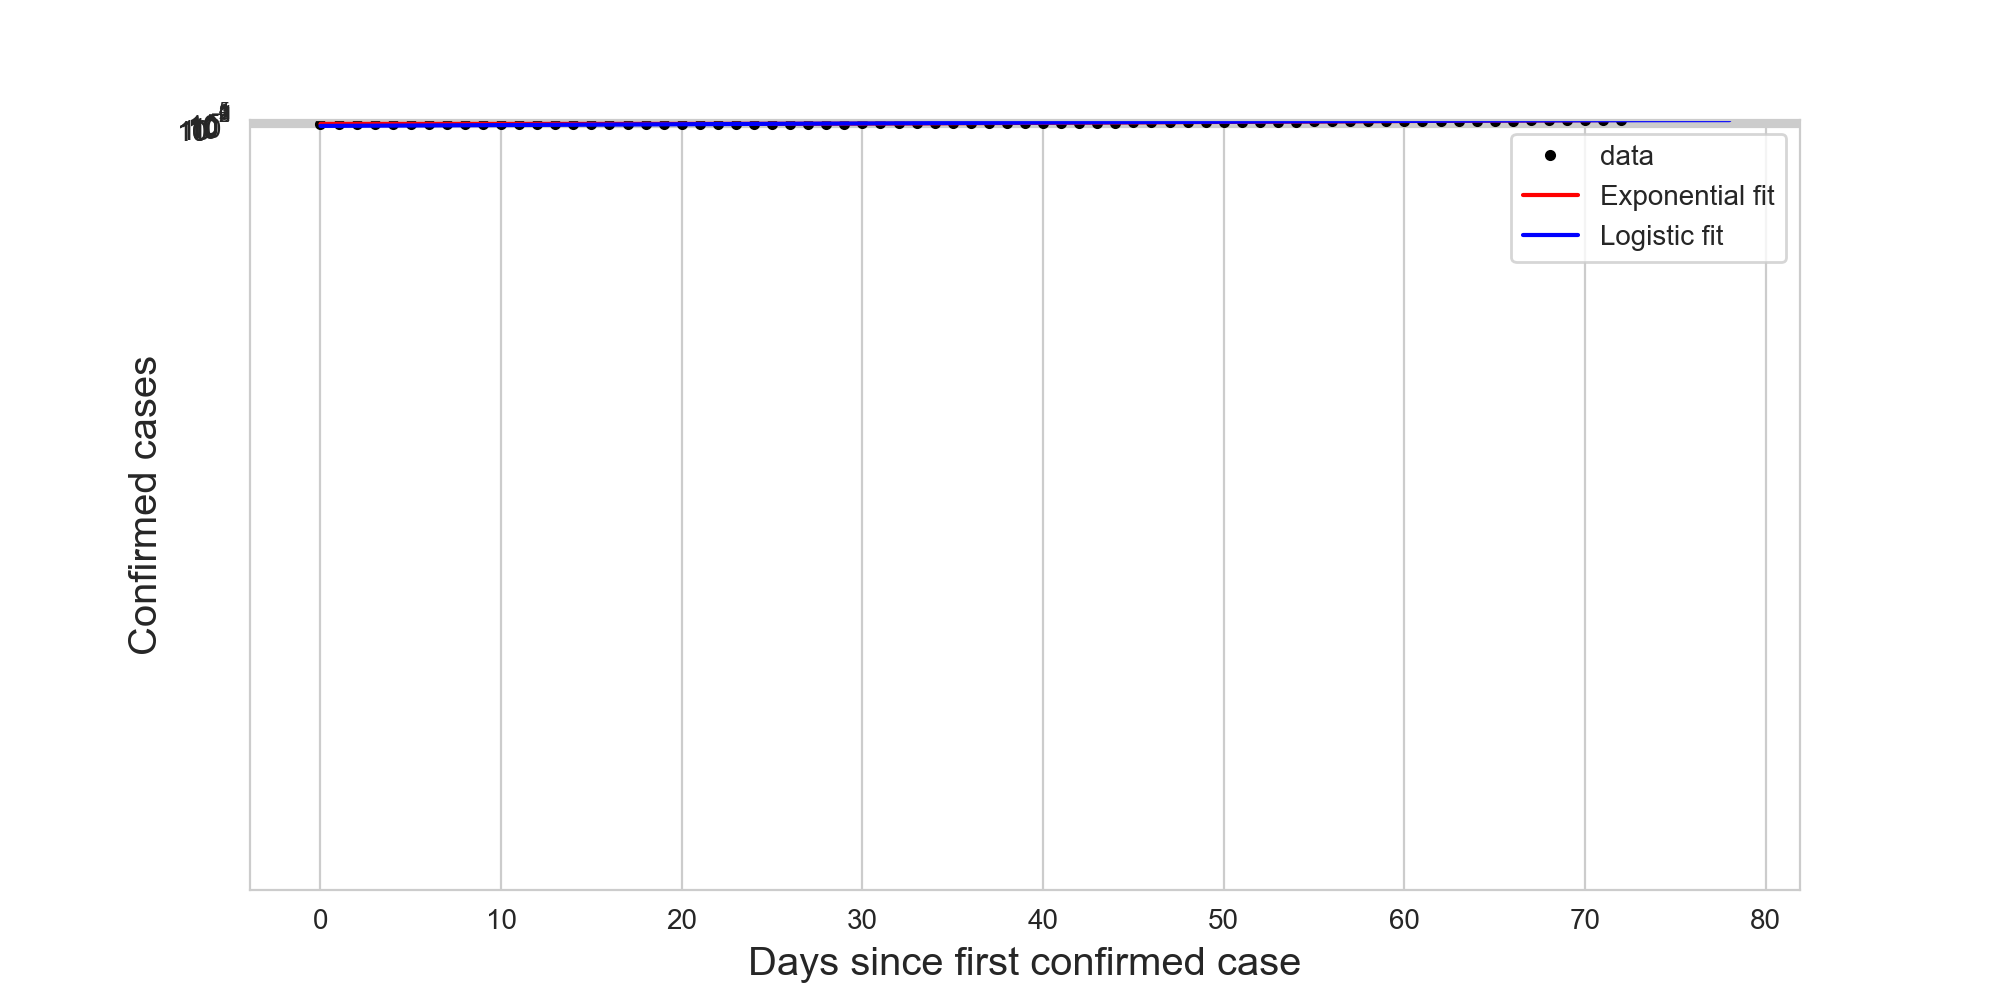

---Exponential fit---

chi^2 =  340562.6715610572 

R^2 =  0.4376979082208603 

fit parametes: a=0.002, b=0.267, c=4.601

covariance matrix:
 [[ 1.151e-07 -8.745e-07 -6.926e-04]
 [-8.745e-07  6.651e-06  5.117e-03]
 [-6.926e-04  5.117e-03  2.484e+01]]

---Logistic fit---

chi^2 =  19002.502049412768 

R^2 =  0.999242078555358 

fit parametes: a=427954.776, b=54555.118, c=0.251, d=26.405, e=0.000

covariance matrix:
 [[ 1.526e+08  4.622e+01 -5.064e+01 -5.861e+03 -7.714e+05]
 [ 4.622e+01  1.400e-05 -1.530e-05 -1.768e-03 -2.320e-01]
 [-5.064e+01 -1.530e-05  2.014e-05  2.501e-03  3.747e-01]
 [-5.861e+03 -1.768e-03  2.501e-03  3.185e-01  5.192e+01]
 [-7.714e+05 -2.320e-01  3.747e-01  5.192e+01  5.755e+04]] 



In [50]:
%matplotlib notebook
import uncertainties as unc
import uncertainties.unumpy as unp

import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

country = "US"
fit_end = covid19_module.index_of_max_R2(df_cases, country)
exp_popt, exp_pcov, R = covid19_module.fit_exponential(country, df_cases, [0, fit_end])
log_popt, log_pcov = covid19_module.fit_logistic(country, df_cases)
covid19_module.plot_fits(country, df_cases, exp_popt, exp_pcov, log_popt, log_pcov, "confirmed")

plt.yscale("log")